# PRINCIPAL COMPONENT ANALYSIS (PCA)
# - George Jeff Onyango
Principal Component Analysis is a statistical method that transforms high-dimensional data into a lower-dimensional form while preserving the most important information. It accomplishes this by identifying new axes, called principal components, along which the data varies the most. These components are orthogonal to each other, meaning they are uncorrelated, making them a powerful tool for dimensionality reduction.

# The Need for Dimensionality Reduction. 

Imagine you have a dataset with many features or variables. Each feature contributes to the overall complexity of the data, making it challenging to analyze, visualize, or build models. High dimensionality can lead to various problems:
- Computational Complexity: As the number of features increases, the computational resources and time required for analysis and modeling grow exponentially.
- Overfitting: Models can become overly complex and fit the noise in the data, leading to poor generalization on new, unseen data.
- Difficulty in Visualization: It becomes challenging to visualize and understand data in more than three dimensions.
- Redundancy: Some features may be highly correlated, meaning they convey similar information. This redundancy can be eliminated without significant loss of information.

This is where PCA comes into play. It helps us reduce the dimensionality of the data while preserving its essential characteristics.

# Maths Behind PCA
PCA begins with a set of data points, typically represented as a matrix, where rows represent observations, and columns represent features.

* Step 1: Data Standardization
Before performing PCA, it’s essential to standardize the data. This means centering the data by subtracting the mean and scaling it by dividing by the standard deviation. Standardization ensures that all features have equal importance in the analysis.
* Step 2: Covariance Matrix
PCA hinges on the computation of the covariance matrix. The covariance between two variables measures how they change together. The covariance matrix for a dataset with n features is an n x n matrix that summarizes the relationships between all pairs of features.
* Step 3: Eigenvalue and Eigenvector Calculation
The next step is to compute the eigenvalues and eigenvectors of the covariance matrix. These eigenvalues represent the amount of variance explained by each eigenvector (principal component). Eigenvalues and eigenvectors are mathematical concepts related to linear transformations and matrices. In the context of PCA, they play a central role in identifying the principal components.
* Step 4: Sorting Eigenvalues and Eigenvectors
To identify the most significant principal components, sort the eigenvalues in descending order. The corresponding eigenvectors are also sorted accordingly. The first principal component explains the most variance, the second explains the second most, and so on.
* Step 5: Selecting Principal Components
Choose a subset of the top k eigenvectors to form a transformation matrix. After computing the eigenvalues and eigenvectors of the covariance matrix, they are sorted in descending order based on the magnitude of their eigenvalues. The principal components are then selected from the top eigenvectors. The first principal component corresponds to the eigenvector with the largest eigenvalue, the second principal component corresponds to the eigenvector with the second-largest eigenvalue, and so on. These principal components are orthogonal, meaning they are uncorrelated. This matrix is used to project the original data into a lower-dimensional space, resulting in the reduced dataset.

In [7]:
'''importing the libraries'''
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [11]:
# importing or loading the dataset
df = pd.read_csv(r"C:\Users\gojef\Downloads\Wine.csv")

# distributing the dataset into two components X and Y
X = df.iloc[:, 0:13].values
y = df.iloc[:, 13].values

In [35]:
'''first ten values of the dataset'''
df.head(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,1
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295,1
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,1
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,1


In [19]:
'''splitting dataset in to training and testing set'''
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [21]:
'''Feature Scaling'''
# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
'''Applying PCA function'''
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

In [25]:
'''Fitting Logistic Regression to the training test '''
from sklearn.linear_model import LogisticRegression as lr

classifier = lr(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [27]:
'''predicting the test set result'''
# Predicting the test set result using
# predict function under LogisticRegression
y_pred = classifier.predict(X_test)

In [29]:
'''making a confusion matrix'''
# making confusion matrix between
#  test set of Y and predicted value.
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

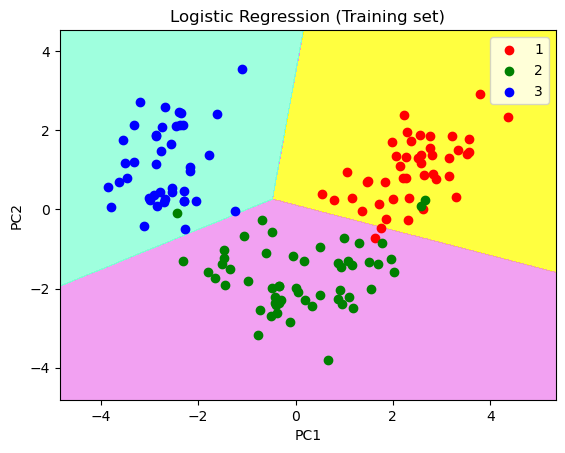

In [31]:
'''predicting the training set result'''
# Predicting the training set
# result through scatter plot
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1,
                               stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1,
                               stop=X_set[:, 1].max() + 1, step=0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
                                                  X2.ravel()]).T).reshape(X1.shape), alpha=0.75,
             cmap=ListedColormap(('yellow', 'violet', 'aquamarine')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color=ListedColormap(('red', 'green', 'blue'))(i), label=j)

plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')  
plt.ylabel('PC2')  
plt.legend() 

# show scatter plot
plt.show()

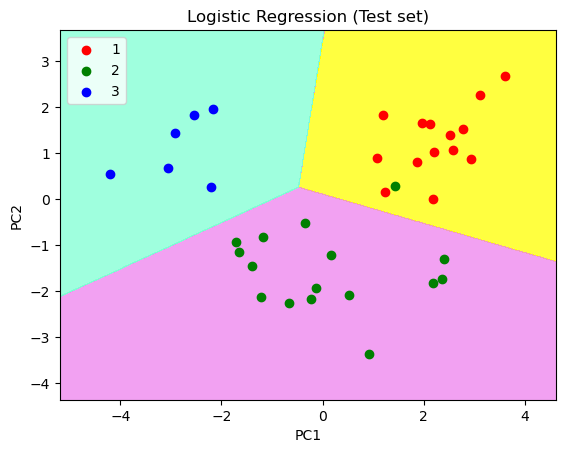

In [33]:
'''visualizing the test set results'''
# Visualising the Test set results through scatter plot
X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1,
                               stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1,
                               stop=X_set[:, 1].max() + 1, step=0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
                                                  X2.ravel()]).T).reshape(X1.shape), alpha=0.75,
             cmap=ListedColormap(('yellow', 'violet', 'aquamarine')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color=ListedColormap(('red', 'green', 'blue'))(i), label=j)

# title for scatter plot
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')  
plt.ylabel('PC2')  
plt.legend()

# show scatter plot
plt.show()

This is a simple example of how to perform PCA using Python. The output of this code will be a scatter plot of the first two principal components and their explained variance ratio. By selecting the appropriate number of principal components, we can reduce the dimensionality of the dataset and improve our understanding of the data.